## Predicting Real Estate Data famous Kaggle competition
Creating a model based on the famous (2nd most popular in history, I think) Sberbank Kaggle competition.

### Main objectives
-	 machine learning to solve price prediction problem
-   Calculate metrics to know when model is ready for prod

### Tasks
-	Encode dataset
-	Split dataset to train and validation datasets
-	Apply decision tree algorithm to build ML (machine learning) model for price predictions
-   Calculate metrics
-   Try other algorithms and factors to get a better solution 


### 1. Load data with real estate prices

In [1]:
# let's import pandas library and set options to be able to view data right in the browser
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.style as style
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)
style.use('fivethirtyeight')
import numpy as np

In [2]:
train_df = pd.read_csv('train.csv')

In [3]:
train_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,detention_facility_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,ekder_female,0_6_all,0_6_male,0_6_female,7_14_all,7_14_male,7_14_female,0_17_all,0_17_male,0_17_female,16_29_all,16_29_male,16_29_female,0_13_all,0_13_male,0_13_female,raion_build_count_with_material_info,build_count_block,build_count_wood,build_count_frame,build_count_brick,build_count_monolith,build_count_panel,build_count_foam,build_count_slag,build_count_mix,raion_build_count_with_builddate_info,build_count_before_1920,build_count_1921-1945,build_count_1946-1970,build_count_1971-1995,build_count_after_1995,ID_metro,metro_min_avto,metro_km_avto,metro_min_walk,metro_km_walk,kindergarten_km,school_km,park_km,green_zone_km,industrial_km,water_treatment_km,cemetery_km,incineration_km,railroad_station_walk_km,railroad_station_walk_min,ID_railroad_station_walk,railroad_station_avto_km,railroad_station_avto_min,ID_railroad_station_avto,public_transport_station_km,public_transport_station_min_walk,water_km,water_1line,mkad_km,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,big_road1_km,ID_big_road1,big_road1_1line,big_road2_km,ID_big_road2,railroad_km,railroad_1line,zd_vokzaly_avto_km,ID_railroad_terminal,bus_terminal_avto_km,ID_bus_terminal,oil_chemistry_km,nuclear_reactor_km,radiation_km,power_transmission_line_km,thermal_power_plant_km,ts_km,big_market_km,market_shop_km,fitness_km,swim_pool_km,ice_rink_km,stadium_km,basketball_km,hospice_morgue_km,detention_facility_km,public_healthcare_km,university_km,workplaces_km,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,mosque_km,theater_km,museum_km,exhibition_km,catering_km,ecology,green_part_500,prom_part_500,office_count_500,office_sqm_500,trc_count_500,trc_sqm_500,cafe_count_500,cafe_sum_500_min_price_avg,cafe_sum_500_max_price_avg,cafe_avg_price_500,cafe_count_500_na_price,cafe_count_500_price_500,cafe_count_500_price_1000,cafe_count_500_price_1500,cafe_count_500_price_2500,cafe_count_500_price_4000,cafe_count_500_price_high,big_church_count_500,church_count_500,mosque_count_500,leisure_count_500,sport_count_500,market_count_500,green_part_1000,prom_part_1000,office_count_1000,office_sqm_1000,trc_count_1000,trc_sqm_1000,cafe_count_1000,cafe_sum_1000_min_price_avg,cafe_sum_1000_max_price_avg,cafe_avg_price_1000,cafe_count_1000_na_price,cafe_count_1000_price_500,cafe_count_1000_price_1000,cafe_count_1000_price_1500,cafe_count_1000_price_2500,cafe_count_1000_price_4000,cafe_count_1000_price_high,big_church_count_1000,church_count_1000,mosque_count_1000,leisure_count_1000,sport_count_1000,market_count_1000,green_part_1500,prom_part_1500,office_count_1500,office_sqm_1500,trc_count_1500,trc_sqm_1500,cafe_count_1500,cafe_sum_1500_min_price_avg,cafe_sum_1500_max_price_avg,cafe_avg_price_1500,cafe_count_1500_na_price,cafe_count_1500_price_500,cafe_count_1500_price_1000,cafe_count_1500_price_1500,cafe_count_1500_price_2500,cafe_count_1500_price_4000,cafe_count_1500_price_high,big_church_count_1500,church_count_1500,mosque_count_1500,leisure_count_1500,sport_count_1500,market_count_1500,green_part_2000,prom_part_2000,office_count_2000,office_sqm_2000,trc_count_2000,trc_sqm_2000,cafe_count_2000,cafe_sum_2000_min_price_avg,cafe_sum_2000_max_price_av

In [4]:
dtypes_dict = {}
col_names = train_df.columns
dtype_list = list(train_df.dtypes)


In [5]:
col_names[0]

'id'

In [6]:
dtype_list[0]

dtype('int64')

In [7]:
for i in range(len(train_df.dtypes)): 
    
    dtypes_dict[col_names[i]] = dtype_list[i]


In [8]:
dtypes_dict


{'id': dtype('int64'),
 'timestamp': dtype('O'),
 'full_sq': dtype('int64'),
 'life_sq': dtype('float64'),
 'floor': dtype('float64'),
 'max_floor': dtype('float64'),
 'material': dtype('float64'),
 'build_year': dtype('float64'),
 'num_room': dtype('float64'),
 'kitch_sq': dtype('float64'),
 'state': dtype('float64'),
 'product_type': dtype('O'),
 'sub_area': dtype('O'),
 'area_m': dtype('float64'),
 'raion_popul': dtype('int64'),
 'green_zone_part': dtype('float64'),
 'indust_part': dtype('float64'),
 'children_preschool': dtype('int64'),
 'preschool_quota': dtype('float64'),
 'preschool_education_centers_raion': dtype('int64'),
 'children_school': dtype('int64'),
 'school_quota': dtype('float64'),
 'school_education_centers_raion': dtype('int64'),
 'school_education_centers_top_20_raion': dtype('int64'),
 'hospital_beds_raion': dtype('float64'),
 'healthcare_centers_raion': dtype('int64'),
 'university_top_20_raion': dtype('int64'),
 'sport_objects_raion': dtype('int64'),
 'addition

In [9]:
train_df_sel = train_df[['id', 'num_room','metro_min_walk','kremlin_km', 'price_doc', 'full_sq', 'life_sq', 'floor', 'university_top_20_raion', 'railroad_station_walk_min', 'big_church_km', 'cafe_avg_price_500', 'cafe_count_500_price_high']]

In [10]:
train_df_sel.head()

,id,num_room,metro_min_walk,kremlin_km,price_doc,full_sq,life_sq,floor,university_top_20_raion,railroad_station_walk_min,big_church_km,cafe_avg_price_500,cafe_count_500_price_high
0,1,NaN,13.575119,15.156211,5850000,43,27.0,4.0,0,65.038716,0.625783,NaN,0
1,2,NaN,7.620630,8.698054,6000000,34,19.0,3.0,0,40.943917,0.967821,1180.00,0
2,3,NaN,17.351515,9.067885,5700000,43,29.0,2.0,0,15.331896,3.178751,916.67,0
3,4,NaN,11.565624,19.487005,13100000,89,50.0,9.0,0,51.497190,1.031777,1250.00,0
4,5,NaN,8.266305,2.578671,16331452,77,77.0,4.0,2,10.247521,0.378756,934.44,0


<AxesSubplot: title={'center': 'full_sq'}>

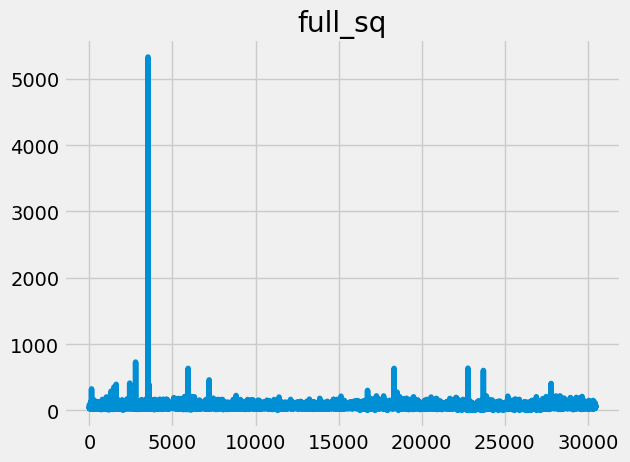

In [11]:
train_df_sel.full_sq.plot(title='full_sq')

<AxesSubplot: title={'center': 'life_sq'}>

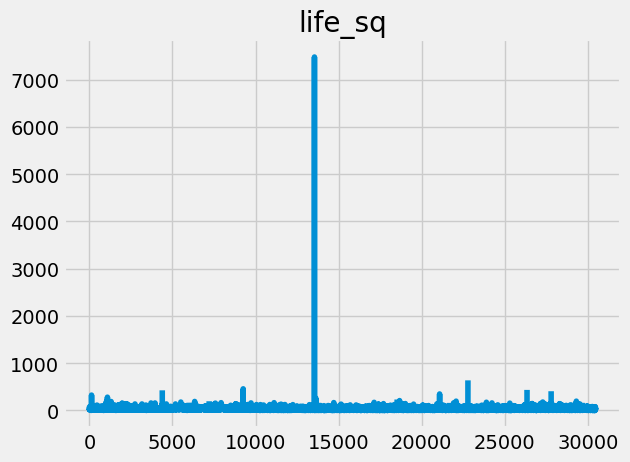

In [12]:
train_df_sel.life_sq.plot(title='life_sq')

<AxesSubplot: title={'center': 'railroad_station_walk_min'}>

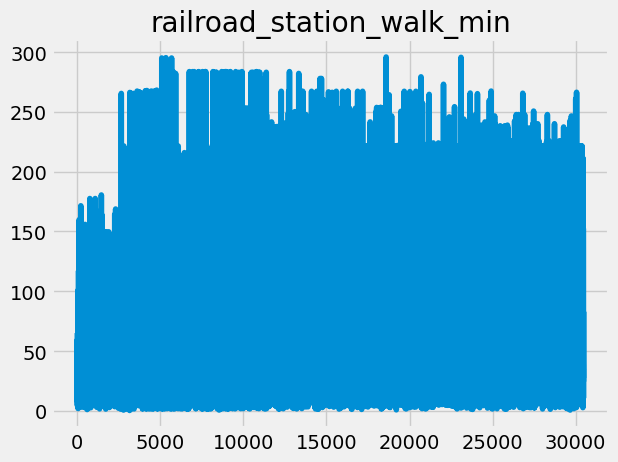

In [13]:
train_df_sel.railroad_station_walk_min.plot(title='railroad_station_walk_min')

<AxesSubplot: title={'center': 'cafe_count_500_price_high'}>

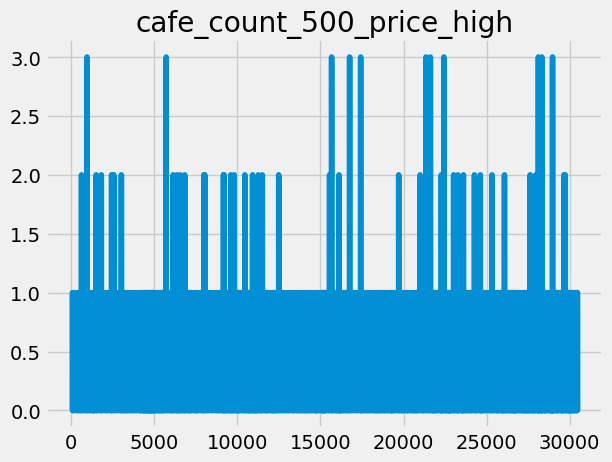

In [14]:
train_df_sel.cafe_count_500_price_high.plot(title='cafe_count_500_price_high')

<AxesSubplot: title={'center': 'price_doc'}>

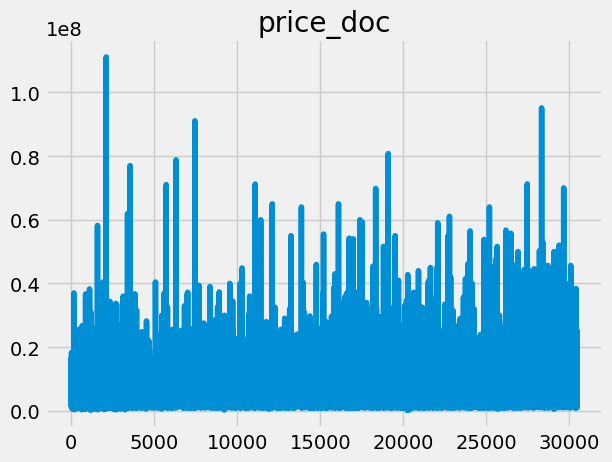

In [15]:
train_df_sel.price_doc.plot(title='price_doc')

In [16]:
train_df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         30471 non-null  int64  
 1   num_room                   20899 non-null  float64
 2   metro_min_walk             30446 non-null  float64
 3   kremlin_km                 30471 non-null  float64
 4   price_doc                  30471 non-null  int64  
 5   full_sq                    30471 non-null  int64  
 6   life_sq                    24088 non-null  float64
 7   floor                      30304 non-null  float64
 8   university_top_20_raion    30471 non-null  int64  
 9   railroad_station_walk_min  30446 non-null  float64
 10  big_church_km              30471 non-null  float64
 11  cafe_avg_price_500         17190 non-null  float64
 12  cafe_count_500_price_high  30471 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 3.0 MB


In [17]:
#train_df_sel.num_room.fillna(train_df_sel.num_room.mode(), inplace=True)
train_df_sel.metro_min_walk.fillna(train_df_sel.metro_min_walk.median())
train_df_sel.kremlin_km.fillna(train_df_sel.kremlin_km.mean())
train_df_sel.full_sq.fillna(train_df_sel.full_sq.median())
train_df_sel.life_sq.fillna(train_df_sel.life_sq.median(), inplace=True)
train_df_sel.floor.fillna(train_df_sel.floor.mode())
train_df_sel.university_top_20_raion.fillna(train_df_sel.university_top_20_raion.mode())
train_df_sel.railroad_station_walk_min.fillna(train_df_sel.railroad_station_walk_min.median())
train_df_sel.big_church_km.fillna(train_df_sel.big_church_km.median())
#train_df_sel.cafe_avg_price_500.fillna(train_df_sel.cafe_avg_price_500.median())
train_df_sel.cafe_count_500_price_high.fillna(train_df_sel.cafe_count_500_price_high.median())






/var/folders/q5/5h91z7d17lz1jdbj04yqhlf40000gn/T/ipykernel_26510/2051349575.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df_sel.life_sq.fillna(train_df_sel.life_sq.median(), inplace=True)


0        0
1        0
2        0
3        0
4        0
        ..
30466    0
30467    0
30468    0
30469    0
30470    0
Name: cafe_count_500_price_high, Length: 30471, dtype: int64

In [18]:
train_df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         30471 non-null  int64  
 1   num_room                   20899 non-null  float64
 2   metro_min_walk             30446 non-null  float64
 3   kremlin_km                 30471 non-null  float64
 4   price_doc                  30471 non-null  int64  
 5   full_sq                    30471 non-null  int64  
 6   life_sq                    30471 non-null  float64
 7   floor                      30304 non-null  float64
 8   university_top_20_raion    30471 non-null  int64  
 9   railroad_station_walk_min  30446 non-null  float64
 10  big_church_km              30471 non-null  float64
 11  cafe_avg_price_500         17190 non-null  float64
 12  cafe_count_500_price_high  30471 non-null  int64  
dtypes: float64(8), int64(5)
memory usage: 3.0 MB


In [19]:
train_df_sel = train_df_sel.drop(columns=['num_room', 'cafe_avg_price_500'])

In [20]:
train_df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         30471 non-null  int64  
 1   metro_min_walk             30446 non-null  float64
 2   kremlin_km                 30471 non-null  float64
 3   price_doc                  30471 non-null  int64  
 4   full_sq                    30471 non-null  int64  
 5   life_sq                    30471 non-null  float64
 6   floor                      30304 non-null  float64
 7   university_top_20_raion    30471 non-null  int64  
 8   railroad_station_walk_min  30446 non-null  float64
 9   big_church_km              30471 non-null  float64
 10  cafe_count_500_price_high  30471 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 2.6 MB


In [21]:
train_df_sel = train_df_sel.dropna()

In [22]:
train_df_sel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30279 entries, 0 to 30470
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         30279 non-null  int64  
 1   metro_min_walk             30279 non-null  float64
 2   kremlin_km                 30279 non-null  float64
 3   price_doc                  30279 non-null  int64  
 4   full_sq                    30279 non-null  int64  
 5   life_sq                    30279 non-null  float64
 6   floor                      30279 non-null  float64
 7   university_top_20_raion    30279 non-null  int64  
 8   railroad_station_walk_min  30279 non-null  float64
 9   big_church_km              30279 non-null  float64
 10  cafe_count_500_price_high  30279 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 2.8 MB


### Create datasets training, testing and a holdout dataset.
Kaggle data already has train and test and our holdout is the competition held out data 

In [23]:
# going to convert price to log because competitoin participants had some success with this

train_df_sel['price_doc'] = np.log(train_df_sel['price_doc'])

<AxesSubplot: >

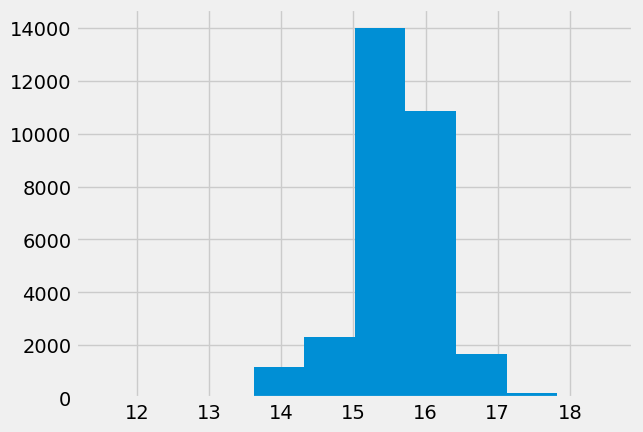

In [24]:

train_df_sel['price_doc'].hist()

In [25]:
## Building Decision Tree model

In [26]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [27]:
#type(X_train)

In [28]:
#test_df = pd.read_csv('test.csv')

In [29]:
#test_df.head()

In [30]:
#for i in test_df.columns:
#    print(i)

In [31]:
#test_df_sel = test_df[['id', 'num_room','metro_min_walk','kremlin_km', 'price_doc', 'full_sq', 'life_sq', 'floor', 'university_top_20_raion', 'railroad_station_walk_min', 'big_church_km', 'cafe_avg_price_500', 'cafe_count_500_price_high']]

# someone deleted the target from the test dataset, so turning the train set into holdout and test sets.... 

went back and added timestamp so I could split

In [32]:
#train_df_sel['timestamp']

In [33]:
from sklearn.model_selection import train_test_split

# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
train_size=0.8

X = train_df_sel.drop(columns = ['price_doc']).copy()
y = train_df_sel['price_doc']


In [34]:
# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

print(X_train.shape), print(y_train.shape)
print(X_valid.shape), print(y_valid.shape)
print(X_test.shape), print(y_test.shape)

(24223, 10)
(24223,)
(3028, 10)
(3028,)
(3028, 10)
(3028,)


(None, None)

In [35]:
y_train= y_train.values.reshape(-1,1)
y_valid= y_valid.values.reshape(-1,1)
print(X_train)


          id  metro_min_walk  kremlin_km  full_sq  life_sq  floor  university_top_20_raion  railroad_station_walk_min  big_church_km  cafe_count_500_price_high
16013  16016        8.564629    3.160234       32     21.0    5.0                        0                  20.163708       0.659288                          0
12320  12323       25.135155   15.773033       45     30.0    3.0                        0                   7.035720       0.272474                          0
17049  17052       51.043790   23.996717       64      1.0   12.0                        0                  29.749581       3.061736                          0
16668  16671       11.473131    2.779592       43     27.0    5.0                        1                  26.734032       0.514151                          0
29849  29852       68.319890   20.092917       58     30.0    3.0                        0                 208.435676       3.050430                          0
...      ...             ...         ...

In [36]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_valid = sc_X.fit_transform(X_valid)
y_train = sc_y.fit_transform(y_train)
y_valid = sc_y.fit_transform(y_valid)

In [37]:
X_train.shape, y_train.shape

((24223, 10), (24223, 1))

In [38]:
tree = DecisionTreeRegressor(max_depth=3, random_state=17)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=17)

In [39]:
tree_predictions = tree.predict(X_valid)

In [40]:
tree_predictions[:5]

array([ 0.19323157,  0.2523936 ,  0.19323157,  0.9682058 , -0.73801395])

In [41]:
predictions = sc_y.inverse_transform(tree_predictions)
values = y_valid
for pred, val in zip(predictions,values):
    print("Prediction: {}, True Value {}".format(pred, val))

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.19323157  0.2523936   0.19323157 ... -0.73801395  0.19323157
  1.852249  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:

print('MAE:', metrics.mean_absolute_error(y_valid, tree_predictions))
print('MSE:', metrics.mean_squared_error(y_valid, tree_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, tree_predictions)))


In [42]:
##Building linear regression 

In [43]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print('MAE:', metrics.mean_absolute_error(y_valid, model.predict(X_valid)))
print('MSE:', metrics.mean_squared_error(y_valid, model.predict(X_valid)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, model.predict(X_valid))))

MAE: 0.5660189806838198
MSE: 0.7299109372251625
RMSE: 0.854348252895248


In [44]:
##Building random forest regressor 

In [45]:
random_forest_model = RandomForestRegressor(n_estimators=15,
                                    bootstrap=0.8,
                                    max_depth=15,
                                    min_samples_split=3,
                                    max_features=1)
random_forest_model.fit(X_train, y_train)
predictions = random_forest_model.predict(X_valid)
print('MAE:', metrics.mean_absolute_error(y_valid, predictions))
print('MSE:', metrics.mean_squared_error(y_valid, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, predictions)))

/var/folders/q5/5h91z7d17lz1jdbj04yqhlf40000gn/T/ipykernel_26510/997764725.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(X_train, y_train)


MAE: 0.5496377879832997
MSE: 0.6927910311081044
RMSE: 0.8323406941319789


ValueError: Expected 2D array, got 1D array instead:
array=[ 0.31979444  0.01858124  0.31311288 ... -0.53446696  0.05711426
  0.92660999].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

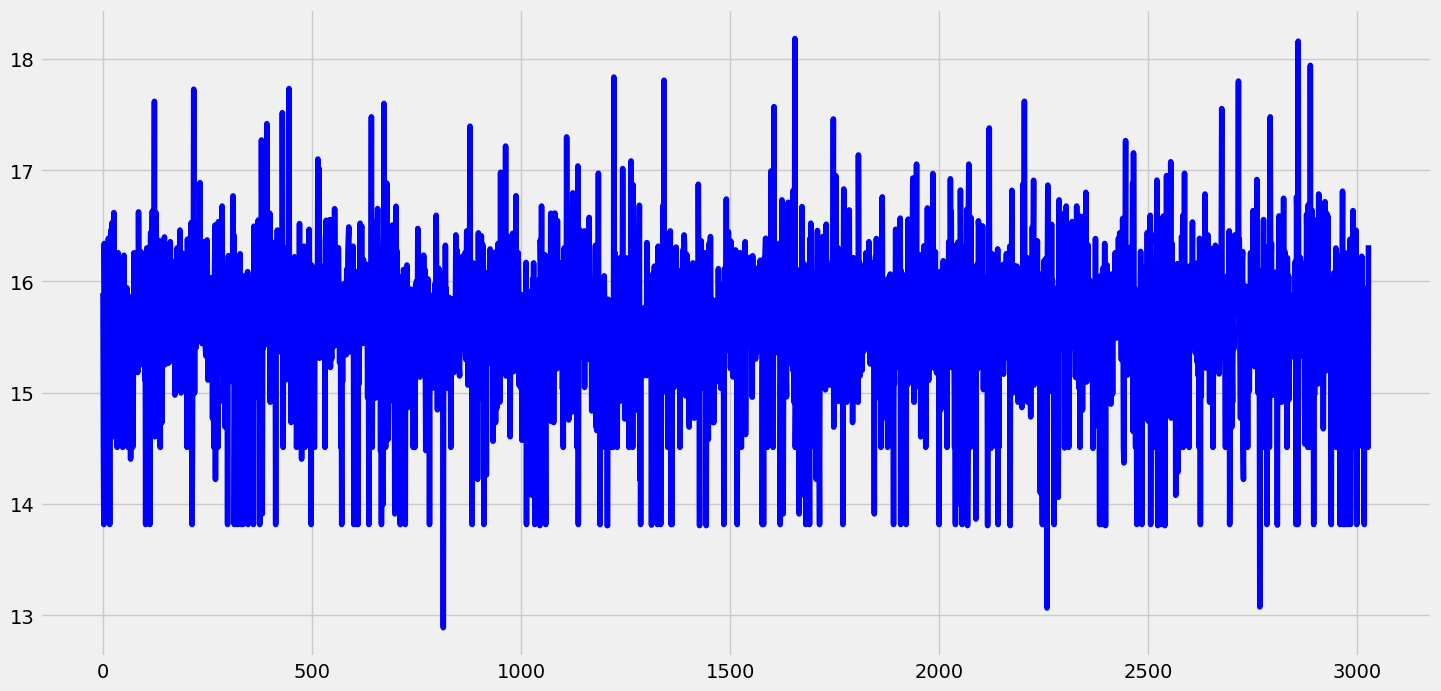

In [46]:
plt.figure(figsize=(16,8))
plt.plot(sc_y.inverse_transform(y_valid),label ='Test', color= 'blue')
plt.plot(sc_y.inverse_transform(predictions), label = 'predict', color = 'orange')
plt.show()

In [ ]:
##Save the model, encoder and the scaler as a pipeline

In [ ]:
import joblib

In [47]:
model_file = 'model_sber.pkl'
scaler_x = 'scaler_x_sber.pkl'
scaler_y = 'scaler_y_sber.pkl'
joblib.dump(sc_X, scaler_x)
joblib.dump(sc_y, scaler_y)
joblib.dump(random_forest_model, model_file)


NameError: name 'joblib' is not defined